# Introduction

<div  style="color:blue;font-family:Candara,arial,helvetica;line-height:20px"><strong>



## Simple linear regression : a single independent variable is used to predict the value of a dependent variable. Multiple linear regression : two or more independent variables are used to predict the value of a dependent variable. The difference between the two is the number of independent variables.


<img src="https://miro.medium.com/max/3444/1*uLHXR8LKGDucpwUYHx3VaQ.png" alt="drawing" width="600" height="300"/> 


<img src="https://4.bp.blogspot.com/-wtbUAbXkXsg/WOtkjEPGMkI/AAAAAAAABpI/eZA-MC9HI-YqaN3545YL62g7ipmer_WXgCLcB/s1600/CASE%2BSTUDY%2BSHELL.png" width="600" height="300"/> 



</strong></div>

# Read Data as Dependent and Independent and Split it to train and test

In [10]:
# Import Pandas for data processing
import pandas as pd

# Read the CSV file
dataset = pd.read_csv('02Students.csv')
print("Display Students Data")
display(dataset)
df = dataset.copy()

# Split into X (Independent) and Y (predicted)
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]


# Split for rows
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =     \
train_test_split (X, Y, test_size = 0.3, random_state=1234)

Display Students Data


,Hours,sHours,Marks
0,0,6,34
1,1,7,36
2,1,6,33
3,1,8,39
4,1,8,42
5,2,8,45
6,2,6,38
7,3,6,45
8,3,7,53
9,3,7,46


# Predict results similar to Simple Linear Regression

In [7]:
# train the Multiple Linear Regression
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()

# Provide the training Data
std_reg.fit(x_train, y_train)

# predict the results
y_predict = std_reg.predict(x_test)

# Calculate RSquared and RMSE

In [13]:
# Get the R-Squared 
mlr_score = std_reg.score(x_test, y_test)

# Coefficient and Intercept
mlr_coefficient = std_reg.coef_
mlr_intercept = std_reg.intercept_

# Equation of the line
#   y = 1.31  + 4.67*Hours + 5.1*SHours

# Calculate the errors using RMSE 
from sklearn.metrics import mean_squared_error
import math

mlr_rmse = math.sqrt(mean_squared_error(y_test, y_predict))

print(mlr_score,mlr_rmse)

# MLR Score> SLR score and RMSE(MLR)<MRSE(SLR)

0.9014449991870028 5.7553639416120195


# Degrees of Freedom & Adjusted R squared




<div  style="color:blue;font-family:Candara,arial,helvetica;line-height:20px"><strong>



## In statistics, the number of degrees of freedom is the number of values in the final calculation of a statistic that are free to vary. The number of independent ways by which a dynamic system can move, without violating any constraint imposed on it, is called number of degrees of freedom.



<img src="https://image.slidesharecdn.com/14multipleregression-131211060215-phpapp01/95/multiple-regression-14-638.jpg?cb=1386742003" alt="drawing" width="600" height="300"/> 

## The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance



<img src="https://4.bp.blogspot.com/-qEGt3DaQIF0/V2meLITZj3I/AAAAAAAAEp4/WKCs0FrI1JsovDMwaw1r1iUboULfRI7MwCLcB/s1600/stb1.png" width="600" height="300"/> 



</strong></div>

# Assumptions of Multiple Linear Regression

## (i)Relationship among variables




<div  style="color:blue;font-family:Candara,arial,helvetica;line-height:20px"><strong>
    
# A.Linearity assumption and Multicolinearity


 ## There must be a linear relationship between the outcome variable and the independent variables. ... Homoscedasticity–This assumption states that the variance of error terms are similar across the values of the independent variables.


<img src="https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2016/12/DLT.png" alt="drawing" width="600" height="300"/> 

## Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity is a problem because it undermines the statistical significance of an independent variable.


<img src="https://slideplayer.com/slide/6326927/21/images/76/Multicollinearity+%E2%80%93+Example.jpg" width="600" height="300"/> 


<img src="https://cdn.wallstreetmojo.com/wp-content/uploads/2019/03/Correlation-Coefficient-Formula-2.jpg" width="600" height="300"/>     


</strong></div>

<div  style="color:blue;font-family:Candara,arial,helvetica;line-height:20px"><strong>
    
# B.Autocorelation


 ## Autocorrelation. Autocorrelation is a measure of the correlation between the lagged values of a time series. For example, r1 is the autocorrelation between yt and yt-1; similarly, r2 is the autocorrelation between yt and yt-2.
Example Temperature,Stock price


<img src="http://www.learnbymarketing.com/wp-content/uploads/2014/01/autocorrelation-function-formula1.png" alt="drawing" width="600" height="300"/> 
     

<img src=" https://www.business-science.io/assets/lag-explanation.PNG " alt="drawing" width="600" height="300"/>     
  

</strong></div>

,t0
0,8
1,14
2,36
3,56
4,84
5,94
6,106
7,110
8,93
9,67


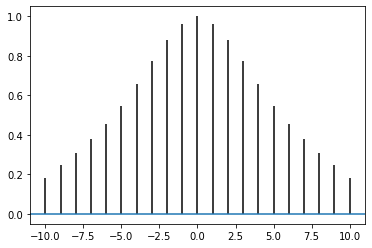

In [17]:
# --------------------------------------------------------------
# Create the Autocorrelation Plot and create time-lagged dataset
# --------------------------------------------------------------

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the corr.csv file
f = pd.read_csv('03 - corr.csv')
display(f)

# Convert the datatype of the variable to float
f['t0'] = pd.to_numeric(f['t0'], downcast='float')

# Plot the autocorrelation plot
plt.acorr(f['t0'], maxlags=10)


In [18]:
# Create the time-lagged dataset and concatenate the results
t_1 = f['t0'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = f['t0'].shift(+2).to_frame()
t_2.columns = ['t-2']

result = pd.concat([f['t0'], t_1, t_2], axis=1)

display(result)

,t0,t-1,t-2
0,8.0,NaN,NaN
1,14.0,8.0,NaN
2,36.0,14.0,8.0
3,56.0,36.0,14.0
4,84.0,56.0,36.0
5,94.0,84.0,56.0
6,106.0,94.0,84.0
7,110.0,106.0,94.0
8,93.0,110.0,106.0
9,67.0,93.0,110.0


<div  style="color:blue;font-family:Candara,arial,helvetica;line-height:20px"><strong>
    
# C.Endogeneity


 ## Technically, in a statistical model you have an endogeneity problem when there is a correlation between your X variable and the error term in your model. What does this mean? Well remember that the error term in your model is due to all of the stuff in your dependent variable that is not due to the variables you have in your model. So in the broadest sense an endogeneity problem arises when there is something that is related to your Y variable that is also related to your X variable, and you do not have that something in your model. Example Temperature,Stock price


<img src="https://slideplayer.com/slide/4642929/15/images/3/Definition+of+Endogeneity.jpg" alt="drawing" width="600" height="300"/> 
     

</strong></div>

## (ii) Behavior of Data

<div  style="color:blue;font-family:Candara,arial,helvetica;line-height:20px"><strong>
    
# A.Normality of Residuals


 ##  the residuals are normally distributed. Typically, you assess this assumption using the normal probability plot of the residuals.


<img src="https://slideplayer.com/slide/14342157/89/images/31/Normality+of+Residuals.jpg" alt="drawing" width="600" height="300"/> 
      

</strong></div>

<div  style="color:blue;font-family:Candara,arial,helvetica;line-height:20px"><strong>
    
# B.Homoscedasticity


## Homoscedasticity. This assumption means that the variance around the regression line is the same for all values of the predictor variable (X). The plot shows a violation of this assumption

<img src="https://slideplayer.com/slide/5745768/19/images/2/Assumption+of+Homoscedasticity.jpg" alt="drawing" width="600" height="300"/> 
      

</strong></div>